In [20]:
# load required modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import rcParams, ticker

# make greek symbols appear on plot
rcParams.update(mpl.rcParamsDefault)

In [21]:
##############################################
###                                        ###
### PLOT NORMAL DISTRIBUTION DENSITY CURVE ###
###       MEAN = mean AND SD = sd          ###
###                                        ###
##############################################

###
# function to plot normal distribution density curve
###
def plot_norm_dist(mean=0, sd=1, n=int(1e6),
                   title = "Normal distribution",
                   subtitle = "(Empirical Rule)",
                   title_size = 14, title_font = 'bold',
                   subtitle_size = 12,
                   nsd = 4,
                   annotations = True,
                   file_name = "normal_distribution.png",
                   save_plot = False):
    '''This function plots the normal distribution density curve with 
    empirical rule annotations'''
    
    # calculate range for smooth plotting, covering 5 standard deviations
    x = np.linspace(mean - 5 * sd, mean + 5 * sd, n)
    kde = norm.pdf(x, mean, sd)
    
    # main plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(x, kde)
    
    # titles
    fig.suptitle(title, fontsize=title_size, fontweight=title_font, y=1)
    ax.text(0.5, 1,
            rf"$\mu = {mean}, \sigma = {sd}$",
            transform=ax.transAxes,
            ha="center",
            fontsize=10,
            )
    # deactivate y-axis, make it start from 0
    ax.yaxis.set_visible(False)
    ax.set_ylim(0, None)
    
    # let only bottom spines visible
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)

    if annotations:
        # add subtitle
        ax.set_title(subtitle, fontsize=subtitle_size, x=0.5, y=1.05)
        # create tick stops
        ticks = np.arange(mean - nsd * sd, mean + (nsd + 1) * sd, sd)
        # function to format ticks with greek symbols
        def ticks_formatter(tick, pos):
            num_str = f"{tick}\n"
            if tick == mean:
                std_str = r"$\mu$"
            else:
                std_str = rf"$\mu{(tick-mean)/sd:+.0f}\sigma$"
            return num_str + std_str
        # mark ticks on x-axis
        ax.set_xticks(ticks)
        # format ticks
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(ticks_formatter))
        # function to find max kde for given x
        def find_y_kde(nsd):
            return [kde for x, kde in zip(x, kde) if x >= mean + sd*nsd][0]
        # find kde
        y_kde_sd1 = find_y_kde(1)*1.3
        y_kde_sd2 = find_y_kde(2)*2.5
        y_kde_sd3 = find_y_kde(3)*10
        # plot vertical lines
        plt.vlines(colors='gray', linestyle="--",
                   x=ticks, ymin=0,
                   ymax=[0, 
                         y_kde_sd3, y_kde_sd2, y_kde_sd1, 
                         max(kde), 
                         y_kde_sd1, y_kde_sd2, y_kde_sd3, 
                         0])
        # function to plot arrow and box
        def plot_arrow_box(nsd, y_kde, pct, col):
            plt.annotate('', arrowprops=dict(arrowstyle='<->, head_width=0.5, head_length=0.75', color=col),
                         xytext=(mean-sd*nsd,y_kde), xy=(mean+sd*nsd,y_kde))
            plt.text(mean, y_kde, pct, fontsize=14, verticalalignment='center', horizontalalignment='center',
                     bbox = dict(facecolor = 'white', edgecolor=col))
        # plot arrow and box
        plot_arrow_box(1, y_kde_sd1, '68%', 'lime')
        plot_arrow_box(2, y_kde_sd2, '95%', 'blue')
        plot_arrow_box(3, y_kde_sd3, '99.7%', 'red')
    # show plot
    plt.show()

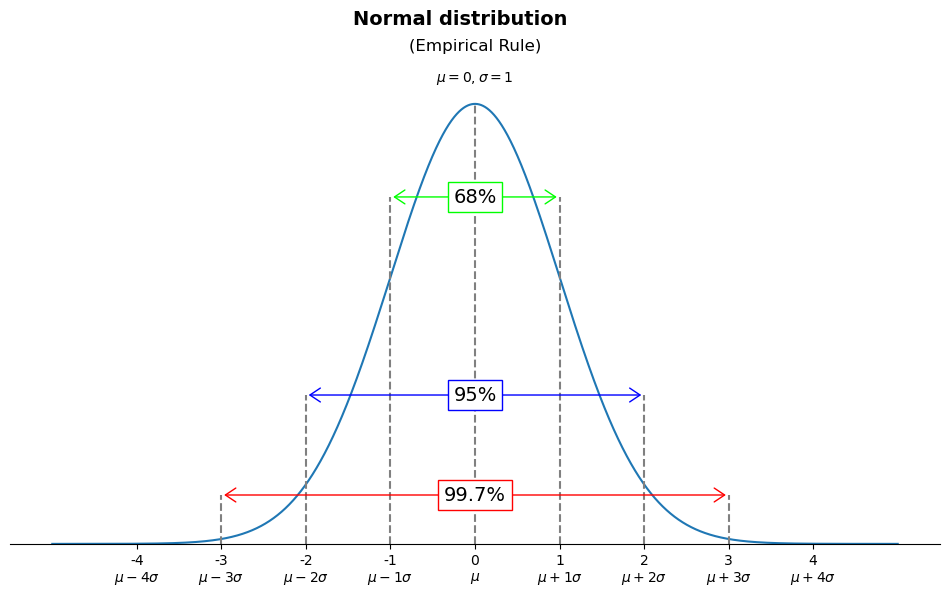

In [22]:
plot_norm_dist(mean=0, sd=1, 
               title='Normal distribution',
               subtitle='(Empirical Rule)',
               annotations=True)